## KickStarter Data Analysis
In this project, a Recommender system will be built to show the successful projects and analyze them from different aspects of available data. In order to have a better understanding, a preprocessing and data cleaning will be done before starting data analysis.

In [24]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

#### Reading data
First we need to read data from CSV file and will print the first 5 rows of table to see each column header

In [25]:
with zipfile.ZipFile("KickStarter.zip") as z:
    with z.open("KickStarter.csv") as f:
        df = pd.read_csv('KickStarter.csv', encoding = "ISO-8859-1")
print(df.shape)
df.head()

(45957, 17)


,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


### Preprocessing and data cleaning
Now, we need to clean the noise and unuseful/unreal data from our dataset in order to have a better understaning

In [26]:
dfc = df[df['goal'] >= 100][df['goal'] <= 20000]
del df
print(dfc.shape)
dfc.head()

(41778, 17)


C:\Users\Immanuel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


### Define categories of projects
Here the categories of projects will be extracted and shown

In [27]:
################ Extract categories  ################
cat_list = dfc['category'].unique()
print('The categories are: ', cat_list)

The categories are:  ['Film & Video' 'Games' 'Fashion' 'Music' 'Art' 'Dance' 'Publishing'
 'Theater' 'Comics' 'Technology' 'Photography' 'Design' 'Food'
 'Film &amp; Video']


### Plot and analyze Successful projects
In this section we try to see the successful projects from different perspectives, such as "duration" and "funded percentage"

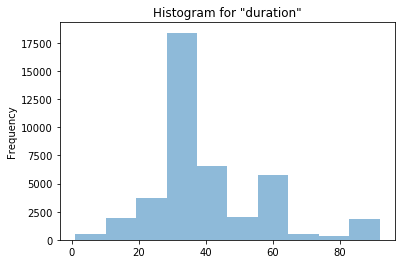

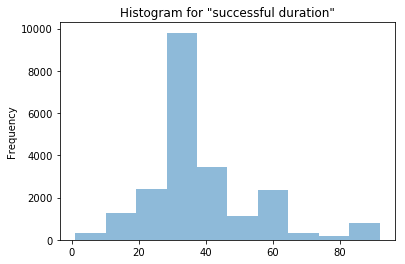

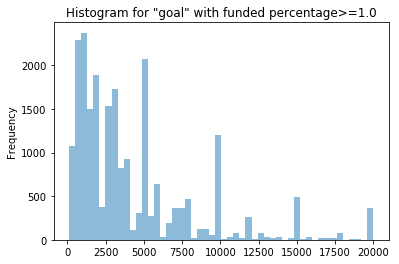

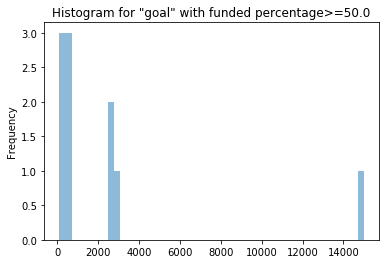

In [28]:
#############  Plot  ######
plt.figure();

dfc['duration'].plot.hist(alpha=0.5, bins=10)
plt.xlabel('')
plt.title('Histogram for "duration"')
plt.show()

dfc['duration'][dfc['status'] == 'successful'].plot.hist(alpha=0.5, bins=10)
plt.xlabel('')
plt.title('Histogram for "successful duration"')
plt.show()

dfc['goal'][dfc['funded percentage'] >= 1.0].plot.hist(alpha=0.5, bins=50)
plt.xlabel('')
plt.title('Histogram for "goal" with funded percentage>=1.0')
plt.show()

dfc['goal'][dfc['funded percentage'] >= 50].plot.hist(alpha=0.5, bins=50)
plt.xlabel('')
plt.title('Histogram for "goal" with funded percentage>=50.0')
plt.show()

In this section we are going to analyze each "category" successful project. In order to do that, we need to extract number of successful project per each category and then plot the histograam

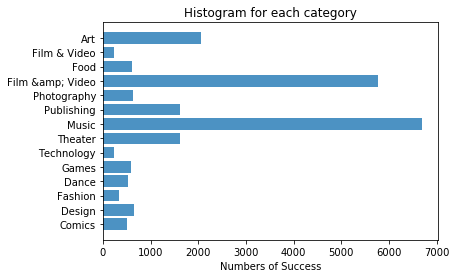

In [29]:
################  plot category histogram  #########
d = {}
for i in cat_list:
    d[i] = dfc['status'][dfc['status'] == 'successful'][dfc['category'] == i].value_counts()
    
plt.barh(range(len(d)), d.values(), align='center', alpha=0.8)
plt.yticks(range(len(d)), d.keys())
plt.xlabel('Numbers of Success')
plt.title('Histogram for each category')
plt.show()

Here we are going to see the successful projects from "Date/Time" perspective. In this case we need to extract date and time of each project and show by year and by month

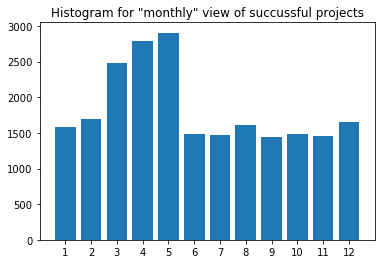

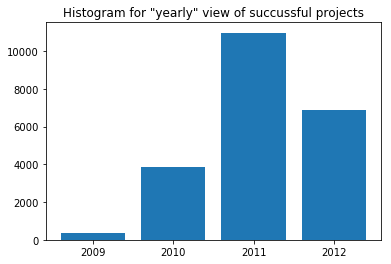

In [30]:
####################  Plot Date   ################
import datetime
fmt = '%a, %d %b %Y %H:%M:%S'
DY = {}
DM = {}
for list_string in dfc['funded date'][dfc['status'] == 'successful']:
    list_string = list_string[:-6]
    list_datetimes = datetime.datetime.strptime(list_string, fmt)
    if list_datetimes.year not in DY:
        DY[list_datetimes.year] = 1
    DY[list_datetimes.year] = DY[list_datetimes.year] + 1
    if list_datetimes.month not in DM:
        DM[list_datetimes.month] = 1
    DM[list_datetimes.month] = DM[list_datetimes.month] + 1
plt.bar(range(len(DM)), DM.values(), align='center')
plt.xticks(range(len(DM)), DM.keys())
plt.title('Histogram for "monthly" view of succussful projects')
plt.show()

plt.bar(range(len(DY)), DY.values(), align='center')
plt.xticks(range(len(DY)), DY.keys())
plt.title('Histogram for "yearly" view of succussful projects')
plt.show()